In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market(2).csv')

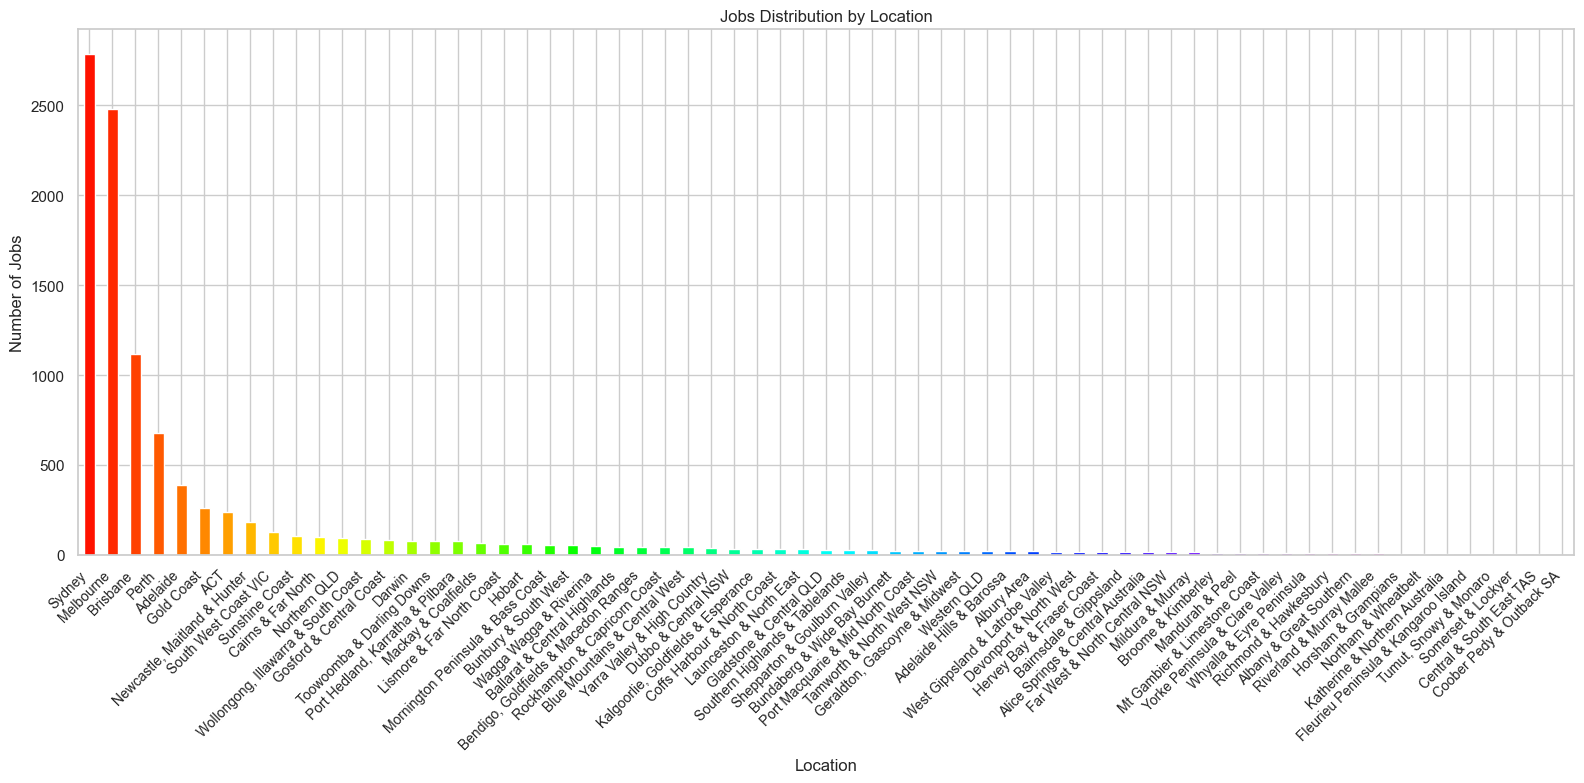

In [21]:
locations = df['Location'].value_counts()

# Generate a color for each location
num_locations = len(locations)
colors = sns.color_palette("hsv", num_locations)

# Plotting
plt.figure(figsize=(16, 8))
locations.plot(kind='bar', color=colors)
plt.title('Jobs Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [33]:
# Create dataframe for salary ranges
df['SalaryRange'] = df[['LowestSalary', 'HighestSalary']].mean(axis=1)

# Group ranges into bins of width 10
bins = range(0, int(df['SalaryRange'].max()) + 11, 10)
labels = [f"{i}-{i+10}" for i in range(0, int(df['SalaryRange'].max()), 10)]
df['SalaryRangeGroup'] = pd.cut(df['SalaryRange'], bins=bins, labels=labels, right=False)

# Calculate % of jobs at each salary level
salary_counts = df['SalaryRangeGroup'].value_counts(normalize=True) * 100

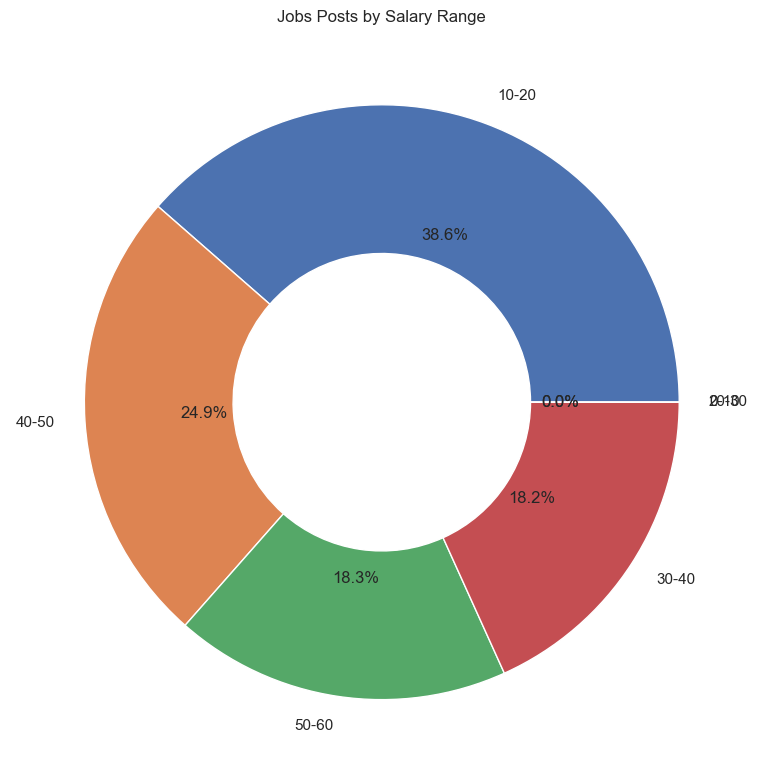

In [44]:
# Salary ranges plot
plt.figure(figsize=(8, 8))

# Create pie chart with a hole in the middle
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5))

# Customizing the plot
plt.title('Jobs Posts by Salary Range')
plt.tight_layout()

plt.show()

In [45]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,SalaryRangeGroup,Location,Count
Location,,,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,238,238,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,390,390,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,19,19,Albury Area,19


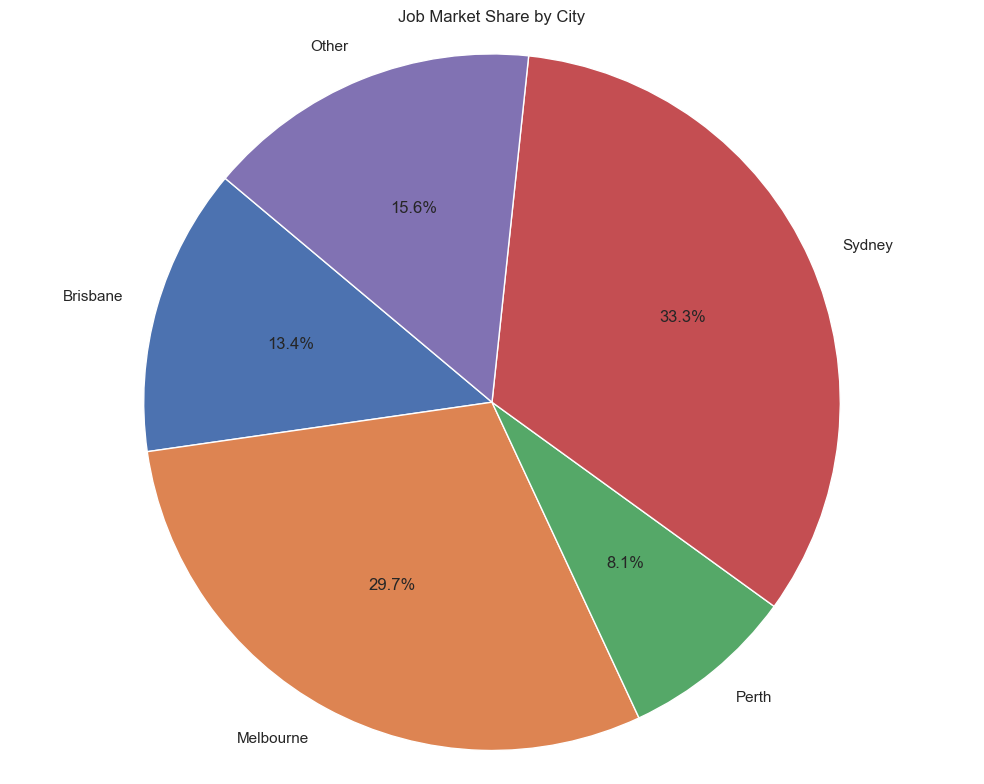

In [50]:
%matplotlib inline
locationDf['Percentage'] = locationDf['Count'] / locationDf['Count'].sum() * 100

# Group cities with very small percentages into one category
threshold = 5
small_cities = locationDf[locationDf['Percentage'] < threshold]
total_percentage = small_cities['Percentage'].sum()
small_cities_row = pd.DataFrame({'Location': ['Other'], 'Percentage': [total_percentage]})
locationDf = locationDf[locationDf['Percentage'] >= threshold]
locationDf = pd.concat([locationDf, small_cities_row])

# Plotting
plt.figure(figsize=(10, 8))

# Create pie chart
plt.pie(locationDf['Percentage'], labels=locationDf['Location'], autopct='%1.1f%%', startangle=140)

# Customizing the plot
plt.title('Job Market Share by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

plt.show()